# Курсова робота на тему 
# "Методи знаходження локальних екстремумів для одновимірної функції". 

### Роботу виконав Тищенко Тимофій Андрійович. 3 курс, група Компютерна математика 2.


   У цій роботі реалізовано 4 методи знаходження екстремумів:
   
    1) Пошук золотого перетину (Golden section search).
    2) Тернарній алгоритм пошуку (Ternary search).
    3) Метод Ньютона 
    4) Метод Брента
    
   Про кожний метод поговоримо докладніше нижче, але для початку показано допоможні функції, щоб потім буле легче орієнтуватися. 
    

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#### Задамо eps 0.0001 для всіх методів та Створимо список коефіцієнтів многочлена для функції

In [3]:
eps = 0.0001

global coefs
coefs = [1, 2, -8, -16, 11, 28, 12] # Коефіцієнти многочлена

f = np.poly1d(coefs)

In [4]:
def equation_in_str(coefs):
    s = ''
    for pow, coef in enumerate(coefs[::-1][:-1]):
        s += f'{coef}*x^{pow} + '

    s += f'{coefs[0]}*x^{len(coefs)-1}'

    return s

#### Графік функції, яку ми викристовуємо 

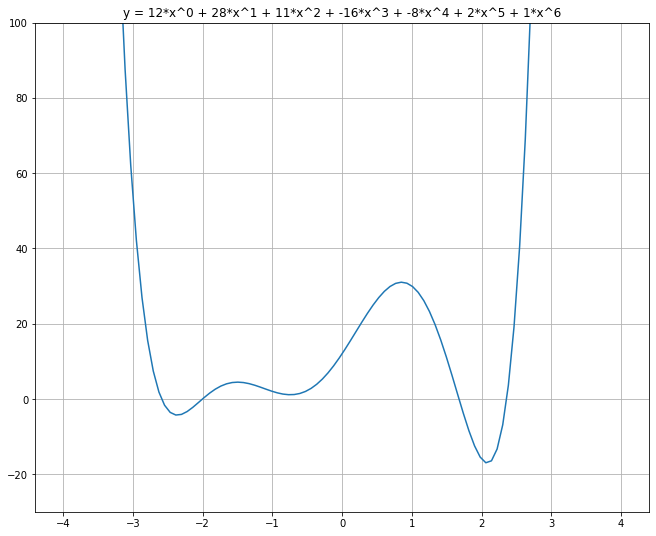

In [5]:
fig = plt.figure(figsize=(11, 9))

x = np.linspace(-4, 4, 100)
y = f(x)

plt.plot(x, y)
plt.title('y = ' + equation_in_str(coefs))
plt.ylim(-30, 100)
plt.grid()
plt.show()

#### Функція для знаходження похідної функції

In [6]:
def diff_(f):
    return np.polyder(f)

#### Перевірка чи функція унімодальна на x є [a, b] (має лише одну точку єкстремуму на проміжку)

In [7]:
def check_if_unimodal(f, a, b):
    F = diff_(f)
    roots = np.roots(F)
    good_x = [x for x in roots if a < x < b]
    if len(good_x) != 1:
        return False
    return True

## 1) Пошук золотого перетину

Пошук золотого перетину (Golden section search) — це техніка пошуку екстремуму (мінімуму чи максимуму) функції всередині заданого інтервалу. Для строго унімодальної функції з екстремумом всередині інтервалу вона знайде цей екстремум, тоді як для інтервалу, що містить кілька екстремумів (можливо, включаючи межі інтервалу), вона збіжиться до одного з них. Якщо єдиний екстремум на інтервалі знаходиться на межі інтервалу, він сходиться до цієї граничної точки. Метод діє шляхом послідовного звуження діапазону значень на заданому інтервалі, що робить його відносно повільним, але дуже надійним. Метод отримав свою назву від того факту, що алгоритм підтримує значення функції для чотирьох точок, три ширини інтервалів яких знаходяться у співвідношенні φ:1:φ де φ – золотий перетин(golden ration). Ці співвідношення зберігаються для кожної ітерації і максимально ефективними. За винятком граничних точок, при пошуку мінімуму центральна точка завжди менша або дорівнює зовнішнім точкам, гарантують, що мінімум міститься між зовнішніми точками. При пошуку максимуму все навпаки. Пошук золотого перерізу був відкритий Кіфером (1953).
    
    
#### Опис алгоритму
    
   Нехай задана функція 

    Тоді для того, щоб знайти невизначене значення цієї функції на заданому відрізку, що відповідає критерію пошуку (нехай це буде мінімум), даний відрізок ділиться в пропорції золотого перерізу в обох напрямах, тобто вибираються дві точки $x_1$ і $x_2$ такі, що:
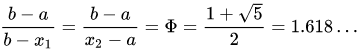, де $Ф$ - золотий переріз.

   Таким чином:
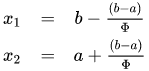
Тобто точка $x_1$ ділить відрізок $[a, x_2]$ у відношенні золотого перерізу. Аналогічно $x_2$ ділить відрізок $[x_1, b]$ у тій же пропорції. Ця властивість і використовується для побудови ітеративного процесу.

#### Алгоритм

*Крок 1.* Задаються початкові межі відрізку $a, b$ і точність $eps$.

*Крок 2.* Розраховують початкові точки ділення: 
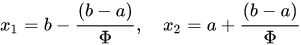
        і значення в них цільової функції:


   - Якщо $y_1>=y_2$ (для пошуку max змінити нерівність на $y_1<=y_2$), то $a=x_1$
   - Інкше $b=x_2$
      
*Крок 3.*
   - Якщо $|b-a| < eps$, то $x = (a+b) / 2$ і завершуємо.
   - Інакше повернення до кроку 2.

### Код для алгоритму пошуку золотого перетину 

#### Задамо $Ф$

In [8]:
phi = (np.sqrt(5) + 1) / 2

#### Функція пошуку золотого перетину (З можливістю вибрати, що хочеш знайти. Точку максимума, чи мінімума)

In [9]:
def golden_section(f, a, b, eps, min_max):
    
    x1 = b - (b - a) / phi
    x2 = a + (b - a) / phi
    while abs(b - a) > eps:
        if min_max == 'min':
            if f(x1) < f(x2):
                b = x2
            else:
                a = x1
        else:
            if f(x1) >= f(x2):
                b = x2
            else:
                a = x1

        # We recompute c and d  to avoid loss of precision 
        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi

    # extremum is between current bounds
    ans = (b + a) / 2
    return round(ans, 2), round(f(ans), 2)


#### Приклад знаходження точки екстремуму функції за допомогою методу Golden section для $x є [a, b]$

Find max using golden section method from 0 to 2


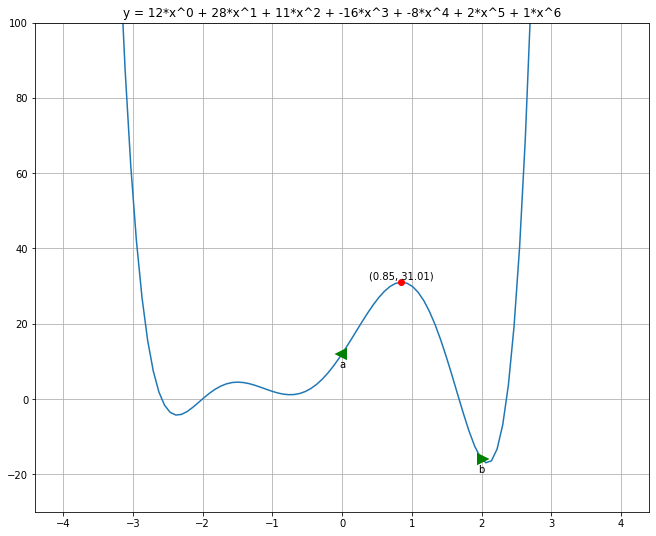

NOTE: if you dont see the red point(extremum) you have to change min_max value


In [10]:
x = np.linspace(-4, 4, 100)
y = f(x)

a = 0
b = 2
min_max = 'max'

if check_if_unimodal(f, a, b):
    ext = golden_section(f, a, b, eps, min_max)
    
    print(f'Find {min_max} using golden section method from {a} to {b}')
    
    fig = plt.figure(figsize=(11, 9))
    
    plt.plot(x, y)
    plt.plot(*ext, marker='o', color='r') # plot extremum
    plt.plot(a, f(a), marker='<', color='g', markeredgewidth=4) # plot left border (a)
    plt.plot(b, f(b), marker='>', color='g', markeredgewidth=4) # plot right border (b)
    
    plt.text(ext[0], ext[1] + 1, f'({ext[0]}, {ext[1]})', horizontalalignment='center')
    plt.text(a, f(a) - 3.5, 'a', horizontalalignment='center')
    plt.text(b, f(b) - 3.5, 'b', horizontalalignment='center')
    
    plt.title('y = ' + equation_in_str(coefs))
    plt.ylim(-30, 100)
    plt.grid()
    plt.show()
    print('NOTE: if you dont see the red point(extremum) you have to change min_max value')
else:
    print(f'This function from {a} to {b} is not unimodal. Please change the range')

## 2) Тернарний алгоритм пошуку 
Тернарний алгоритм пошуку (Ternary search) — це техніка в інформатиці для знаходження мінімуму або максимуму унімодальної функції . Потрійний пошук визначає, що мінімум або максимум не може бути в першій третині домену або що він не може бути в останній третині домену, а потім повторюється на решті двох третин. Потрійний пошук є прикладом алгоритму « розділяй і володарюй ».

Припустимо, ми шукаємо максимум $f(x)$ і що ми знаємо, що максимум лежить десь посередині $А$ і $B$. Щоб алгоритм був застосовним, має бути якесь значення $x$ такe, що:
  - для усіх $a, b$ з $A <= a < b <= x$, ми маємо $f(a) < f(b)$, і
  - для усіх $a, b$ з $x <= a < b <= B$, ми маємо $f(a) > f(b)$.
  
#### Алгоритм
Дозволяє f(x) бути унімодальною функцією на деякому інтервалі $[l;r]$. Візьміть будь-які дві точки $m_1$ і $m_2$ в цьому сегменті: $l<m_1<m_2<r$. Тоді є три можливості:
  - якщо $f(m_1)<f(m_2)$, то необхідний максимум не може бути розташований з лівого боку $–[l;m_1]$. Це означає, що максимум далі має сенс дивитися тільки в проміжку $[m_1; r]$
  - якщо $f(m_1)>f(m_2)$, що ситуація схожа на попередню, аж до симетрії. Тепер необхідний максимум не може бути в правій частині $–[m_2; r]$, тож перейдіть до сегмента $[l;m_2]$
  - якщо $f(m_1) = f(m_2)$, то обшук слід провести в $[m_1;m_2]$, але цей випадок можна віднести до будь-якого з двох попередніх (з метою спрощення коду). Рано чи пізно довжина відрізка буде трохи менше заданої константи, і процес можна зупинити.
  
точки вибору $m_1$ i $m_2$:
  - $m_1=l+(r-l)/3$
  - $m_2=r-(r-l)/3$
 

## Код для алгоритму Тернарного пошуку

#### Функція тернарного пошуку (З можливістю вибрати, що хочеш знайти. Точку максимума, чи мінімума)

In [11]:
def ternary_search(f, a, b, eps, min_max):
    while abs(b - a) >= eps:
        left_t = a + (b - a) / 3
        right_t = b - (b - a) / 3

        if min_max == 'max':
            if f(left_t) > f(right_t):
                b = right_t
            else:
                a = left_t
        else:
            if f(left_t) <= f(right_t):
                b = right_t
            else:
                a = left_t

    # maximum is between current bounds
    ans = (b + a) / 2
    return round(ans, 2), round(f(ans), 2)


#### Приклад знаходження мінімуму за допомогою Тернарного пошуку для $x є [a, b]$

Find min using ternary search method from -1.3 to 0.5


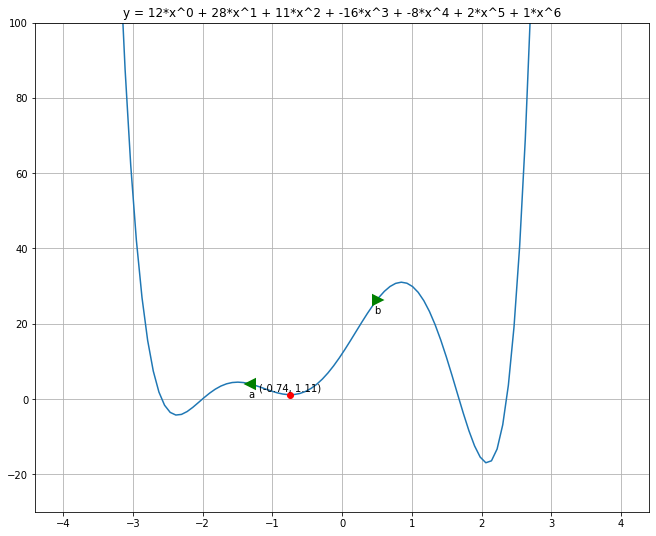

NOTE: if you dont see the red point(extremum) you have to change min_max value


In [12]:
x = np.linspace(-4, 4, 100)
y = f(x)

a = -1.3
b = 0.5
min_max = 'min'

if check_if_unimodal(f, a, b):
    ext = ternary_search(f, a, b, eps, min_max)
    print(f'Find {min_max} using ternary search method from {a} to {b}')
    
    fig = plt.figure(figsize=(11, 9))
    
    plt.plot(x, y)
    plt.plot(*ext, marker='o', color='r') # plot extremum
    plt.plot(a, f(a), marker='<', color='g', markeredgewidth=4) # plot left border (a)
    plt.plot(b, f(b), marker='>', color='g', markeredgewidth=4) # plot right border (b)
    
    plt.text(ext[0], ext[1] + 1, f'({ext[0]}, {ext[1]})', horizontalalignment='center')
    plt.text(a, f(a) - 3.5, 'a', horizontalalignment='center')
    plt.text(b, f(b) - 3.5, 'b', horizontalalignment='center')
    
    plt.title('y = ' + equation_in_str(coefs))
    plt.ylim(-30, 100)
    plt.grid()
    plt.show()
    print('NOTE: if you dont see the red point(extremum) you have to change min_max value')
else:
    print(f'This function from {a} to {b} is not unimodal. Please change the range')

## 3) Метод Ньютона

У обчисленні метод Ньютона є ітераційним методом для знаходження коренів диференційованої функції $F$ , які є розв’язками рівняння $F( x ) = 0$ . Таким чином, метод Ньютона можна застосувати до похідної $f ′$ двічі диференційованої функції $f$ , щоб знайти корені похідної (розв’язки $f ′( x ) = 0$ ), також відомі як критичні точки $f$. Ці рішення можуть бути мінімумами, максимумами або сідловими точками.
Y
#### Робота алгоритму

Центральною проблемою оптимізації є мінімізація функцій. 

Дано двічі диференційовану функцію $ f: R → R$, ми прагнемо вирішити задачу оптимізації $min_{хєR} f(x)$.

Метод Ньютона намагається вирішити цю проблему шляхом побудови послідовності ${x_k}$ з початкового припущення (початкова точка) $x_0 є R$ що сходить до мінімізатора $x_*$ з $f$ за допомогою послідовності наближень Тейлора другого порядку $f$ навколо ітерацій. Розкладання Тейлора другого порядку $f$ навколо $x_k$ є
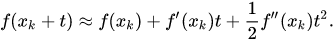

Наступна ітерація $x_{k+1}$ визначається так, щоб мінімізувати це квадратичне наближення до $t$, і налаштування $x_{k + 1} = x_k + t$. Якщо друга похідна додатна, квадратичне наближення є опуклою функцією від $t$, а його мінімум можна знайти, встановивши похідну на нуль. Оскільки
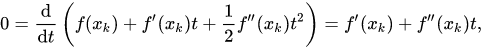

досягається мінімум для 
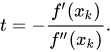

Зібравши все разом, метод Ньютона виконує ітерацію
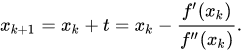

## Код для методу Ньютона

#### Функція яка за методом Ньютона знаходить екстремум найближче до точки припущення

In [13]:
def newton(f0, x0, eps, max_iter):

    f = diff_(f0)
    F = diff_(f)

    xn = x0
    for n in range(0, max_iter):
        fxn = f(xn)
        if abs(fxn) < eps:
            # print('Found solution after',n,'iterations.')
            return xn
        Fxn = F(xn)
        if Fxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Fxn
    print('Exceeded maximum iterations. No solution found.')
    return None


####  Оскільки в методі Ньютона ми повинні дати припущення, де знаходиться екстремум, щоб знайти всі точки екстремуму, я вирішив одразку створити 50 припущень для $xє[-20, 20]$, щоб знайти всі екстремуми в моїй функції

[[-2.36, -4.31], [2.08, -17.05], [-1.5, 4.45], [-0.74, 1.11], [0.85, 31.01]]


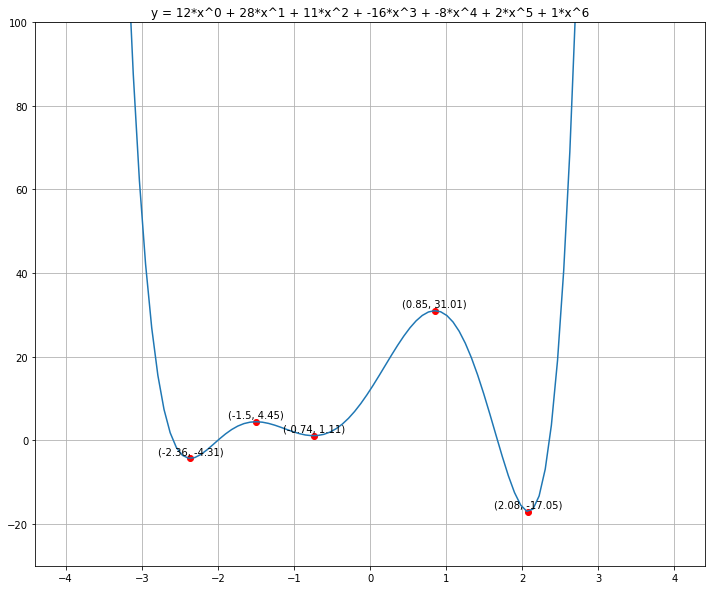

In [14]:
fig = plt.figure(figsize=(12, 10))

all_extremum = []

for guess in np.linspace(-20, 20, 50):
    ext = round(newton(f, guess, eps, 50), 2) # find extremum value nearest to guess 
    if ext and ext not in map(lambda x: x[0], all_extremum):
        all_extremum.append([ext, round(f(ext), 2)])

print(all_extremum)

x = np.linspace(-4, 4, 100)
y = f(x)

str_eq = equation_in_str(coefs)

for p in all_extremum:
    plt.plot(*p, marker='o', color='r')
    plt.text(p[0], p[1] + 1, f'({p[0]}, {p[1]})', horizontalalignment='center')

plt.title('y = ' + str_eq)
plt.ylim(-30, 100)
plt.grid()
plt.plot(x, y)
plt.show()

## 4) Метод Брента

У чисельному аналізі метод Брента являє собою гібридний алгоритм пошуку коренів, що поєднує метод бісекції , метод січної та оборнено-квадратичну інтерполяцію . Він має надійність поділу навпіл, але може бути таким же швидким, як і деякі менш надійні методи. Алгоритм намагається використовувати потенційно швидко збіжний метод січної або обернено-квадратичну інтерполяцію, якщо це можливо, але, якщо необхідно, він повертається до більш надійного методу бісекції. Метод Брента створений Річардом Брентом і ґрунтується на попередньому алгоритмі Теодора Деккера. Отже, метод також відомий як Метод Брента-Деккера.

#### Розберемося з 3 методами, які викристовуюються у методі Брента.

##### Метод бісекції
Метод бісекції також називають методом інтервального вдвічі, методом двійкового пошуку або методом дихотомії. Він заснований на теоремі Больцано для неперервних функцій.

Теорема Больцано: якщо функція $f(x)$ неперервна на інтервалі $[a,b]$ і $f(a)*f(b)<0$, то існує значення $c ϵ (a,b)$, для якого $f(c) =0$.

$f(a)*f(b)$, означає що вони обидва мають протилежні знаки. Значення $x$, для якого графік перетинає вісь $x$, є коренем рівняння $f(x)=0$. Близькість цього кореня до дійсного кореня залежить від допуску, який ми встановили для алгоритму.

Для даної функції $f(x)$ метод бісекції працює наступним чином:
 - 1) Вибрати $a$ і $b$, для яких $f(a)*f(b)<0$.
 - 2) Середня точка c обчислюється як середнє значення $a$ і $b$, $c=(a+b)/2$.
 - 3) Оцініти $f(c)$. 
 - 4) Якщо $f(c)=0$, ми знайшли корінь. Повернути його (return).
 - 5) Якщо $f(c)*f(b)>0$ замінити $b$ на $c$.
 - 6) Перейти до кроку 2 або закінчити, якщо маквсимальна кількість ітерацій досягунта або допустиме  відхілення задоволене.
 
##### Метод січної
Метод січної вважається найбільш ефективним у знаходженні кореня нелінійного рівняння. Це відноситься до типу відкритого кронштейна. Цей метод використовує два початкових припущення та знаходить корінь функції за допомогою інтерполяції. При послідовній ітерації два останніх припущення використовуються для пошуку наступного наближення.

Метод січної працює наступним чином:
 - 1) Отримати початкові значення припущень $a, b$ і допустиме відхилення $e$.
 - 2) Оцінити $f(a),f(b)$.
 - 3) $c= b−(f(b)∗(b−a))/(f(b)−f(a))$.
 - 4) Перейти до кроку 2 або закінчити, якщо $f(c)=0$ або $|c-b| < е$.
 
##### Метод оберненої квадратичної інтерполяції
У цьому методі скажімо, що є три точки $x_{n–2}, x_{n–1}$ і $x_n$ як початкові значення. Функція буде оцінена в кожній з цих точок, у результаті чого $y_{n –2} = f(x_{n –2}), y_{n –1} = f(x_{n –1})$ та $y_n = f(x_n )$, відповідно. Якщо вважати, що $f$ має обернену квадратичну функцію $g$, то $x_{n –2} = g(y_{n –2}), x_{n –1} = g(y_{n –1})$ і $x_n = g(y_n)$, і так далі. Цей процес виконується шляхом обчислення параболи, яка проходить через ці три задані точки, і взяття перетину параболи з віссю $x$ як нової оцінки кореня. 
Підігнавши точки за допомогою параболи в $y$, маємо:
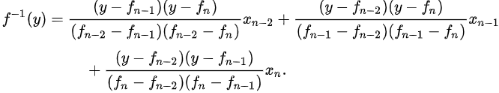
Цю форму також називають поліномом Лагранжа. Встановивши $y = 0$, нова коренева оцінка, $x_{n+1}$, буде обчислена таким чином:
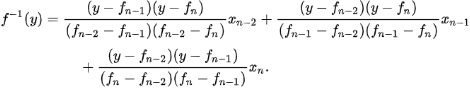
Однак він не може обчислити комплексні корені, оскільки завжди перетинатиме вісь $x$. Крім того, якщо вибрані три початкові значення припущення дуже далекі від кореня, цей метод не збіжиться.

#### Об'єднаємо ці методи в один, щоб вийшов метод Брента
На кожній ітерації метод Брента-Деккера спочатку пробує крок методу січної або ОКІ. Якщо цей крок незадовільний, що зазвичай означає занадто довгий, занадто короткий або занадто близький до кінцевої точки поточного інтервалу, то крок повертається до кроку поділу навпіл. Цей крок повернення захищає метод від виконання величезної кількості кроків із меншим збільшенням значення кореня.

#### Використання методу Брента для знаходження екстремумів
Метод Брента знаходить корені рівняння $f(x) = 0$, а як ми знаємо, точки ексремума, це точки в яких $f'(x) = 0$. Отже перед використанням методу Брента, потрібно продифернціювати нашу функцію. Я цей крок додам одразу до функції

In [15]:
def brents(f0, x0, x1, max_iter=50, tolerance=eps):
    
    f = diff_(f0)
 
    fx0 = f(x0)
    fx1 = f(x1)
 
    assert (fx0 * fx1) <= 0, "Root not bracketed" 
 
    if abs(fx0) < abs(fx1):
        x0, x1 = x1, x0
        fx0, fx1 = fx1, fx0
 
    x2, fx2 = x0, fx0
 
    mflag = True
    steps_taken = 0
 
    while steps_taken < max_iter and abs(x1-x0) > tolerance:
        fx0 = f(x0)
        fx1 = f(x1)
        fx2 = f(x2)
 
        if fx0 != fx2 and fx1 != fx2:
            L0 = (x0 * fx1 * fx2) / ((fx0 - fx1) * (fx0 - fx2))
            L1 = (x1 * fx0 * fx2) / ((fx1 - fx0) * (fx1 - fx2))
            L2 = (x2 * fx1 * fx0) / ((fx2 - fx0) * (fx2 - fx1))
            new = L0 + L1 + L2
 
        else:
            new = x1 - ( (fx1 * (x1 - x0)) / (fx1 - fx0) )
 
        if ((new < ((3 * x0 + x1) / 4) or new > x1) or
            (mflag == True and (abs(new - x1)) >= (abs(x1 - x2) / 2)) or
            (mflag == False and (abs(new - x1)) >= (abs(x2 - d) / 2)) or
            (mflag == True and (abs(x1 - x2)) < tolerance) or
            (mflag == False and (abs(x2 - d)) < tolerance)):
            new = (x0 + x1) / 2
            mflag = True
 
        else:
            mflag = False
 
        fnew = f(new)
        d, x2 = x2, x1
 
        if (fx0 * fnew) < 0:
            x1 = new
        else:
            x0 = new
 
        if abs(fx0) < abs(fx1):
            x0, x1 = x1, x0
 
        steps_taken += 1
 
    return round(x1, 2), round(f0(x1), 2)

Find min using Brent's method method from 0 to 1


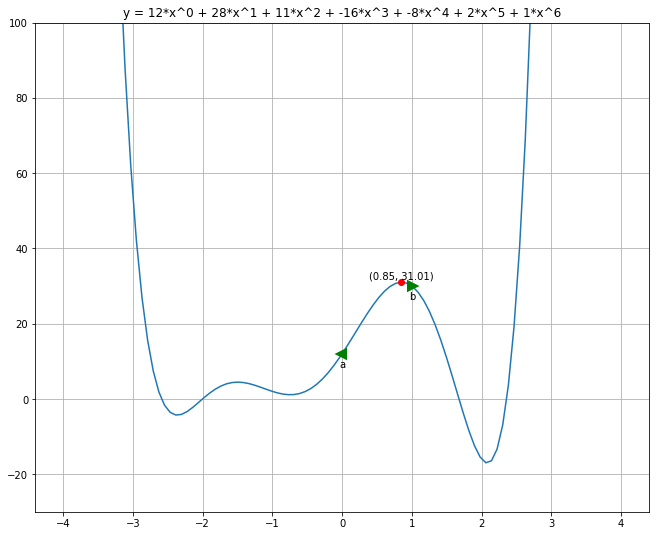

NOTE: if you dont see the red point(extremum) you have to change min_max value


In [16]:
x = np.linspace(-4, 4, 100)
y = f(x)

a = 0
b = 1

if check_if_unimodal(f, a, b):
    ext = brents(f, a, b, tolerance=eps)
    print(f"Find {min_max} using Brent's method method from {a} to {b}")
    
    fig = plt.figure(figsize=(11, 9))
    
    plt.plot(x, y)
    plt.plot(*ext, marker='o', color='r') # plot extremum
    plt.plot(a, f(a), marker='<', color='g', markeredgewidth=4) # plot left border (a)
    plt.plot(b, f(b), marker='>', color='g', markeredgewidth=4) # plot right border (b)
    
    plt.text(ext[0], ext[1] + 1, f'({ext[0]}, {ext[1]})', horizontalalignment='center')
    plt.text(a, f(a) - 3.5, 'a', horizontalalignment='center')
    plt.text(b, f(b) - 3.5, 'b', horizontalalignment='center')
    
    plt.title('y = ' + equation_in_str(coefs))
    plt.ylim(-30, 100)
    plt.grid()
    plt.show()
    print('NOTE: if you dont see the red point(extremum) you have to change min_max value')
else:
    print(f'This function from {a} to {b} is not unimodal. Please change the range')